In [ ]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.

In [ ]:
# import ADULTS dataset
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# read dataset
df = pd.read_csv(url, names=column_names, skipinitialspace=True)

#print the number of lines of the dataset
print(f"There are {df.shape[0]} lines in the dataset")

There are 32561 lines in the dataset


In [ ]:
# show top 5 lines
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


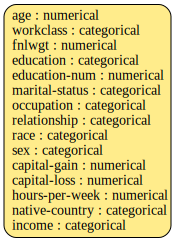

In [ ]:
from sdv.metadata import SingleTableMetadata

# create Metadata
metadata = SingleTableMetadata()

# detect the metadata form the dataframe
metadata.detect_from_dataframe(df)

# show the metadata for the dataset
metadata.visualize()



In [ ]:
# initialize a synthetic data generator using the metadata
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
# train the synthesier to fit the data
synthesizer.fit(
    data=df
)

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=df.shape[0]
)

synthetic_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,20,Self-emp-not-inc,165948,11th,8,Never-married,Sales,Wife,White,Female,1596,3,56,United-States,<=50K
1,20,Private,328887,Masters,11,Never-married,Prof-specialty,Wife,White,Female,34350,0,35,Italy,<=50K
2,44,Local-gov,50757,HS-grad,7,Never-married,Craft-repair,Not-in-family,White,Female,14424,0,50,United-States,<=50K
3,53,Private,274515,10th,11,Never-married,Adm-clerical,Not-in-family,Asian-Pac-Islander,Male,81220,1,54,Canada,>50K
4,48,Self-emp-not-inc,133126,Some-college,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,10165,76,34,United-States,>50K


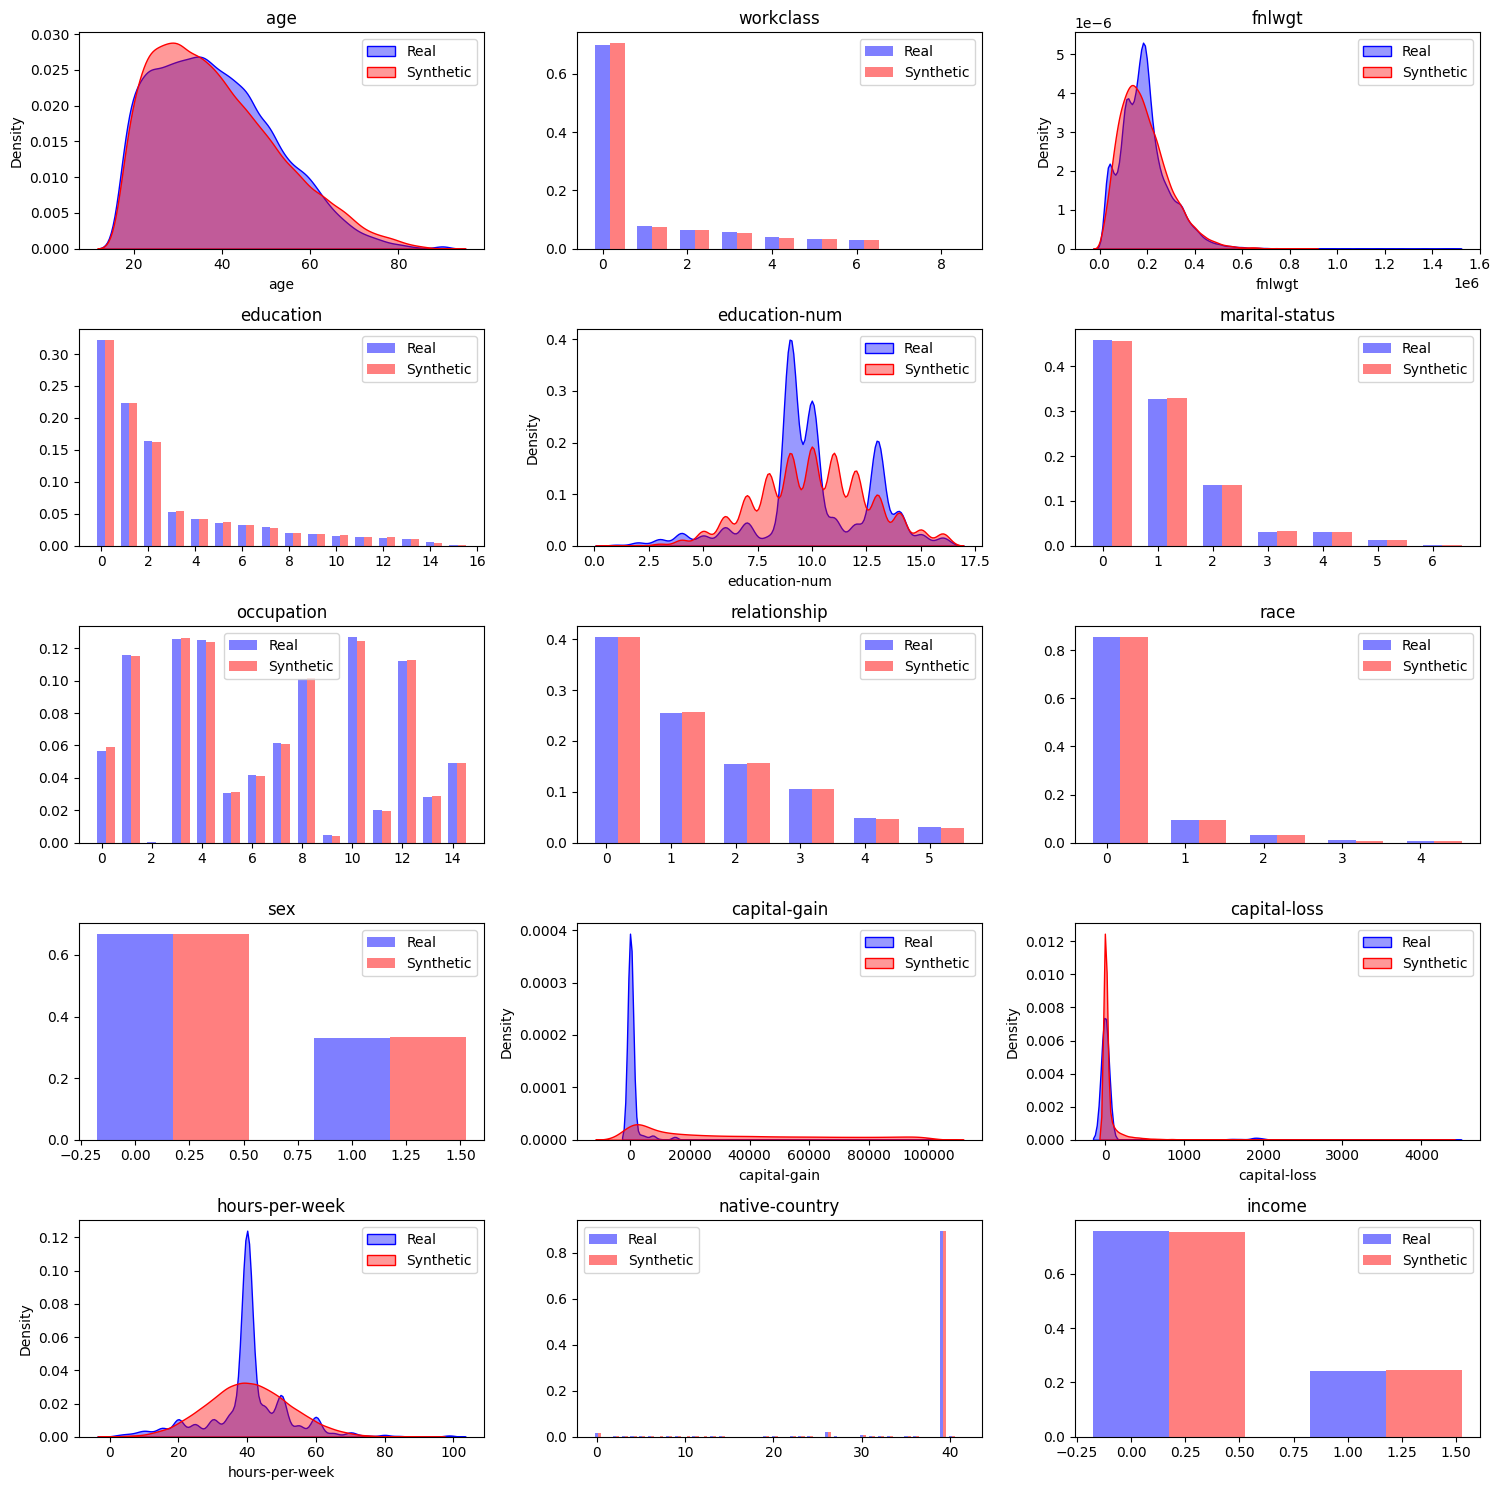

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution_comparison(real_df, synthetic_df):
    """对比原始数据集和合成数据集的特征分布，每个特征一个子图"""

    num_cols = len(real_df.columns)  # 获取特征数
    num_rows = math.ceil(num_cols / 3)  # 动态计算行数，确保能容纳所有子图
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 3))
    axes = axes.flatten()  # 将子图数组展平，方便索引

    for i, column in enumerate(real_df.columns):
        ax = axes[i]

        # 判断是数值型还是类别型数据
        if pd.api.types.is_numeric_dtype(real_df[column]):
            # 数值型特征 -> KDE 密度图
            sns.kdeplot(real_df[column], label="Real", ax=ax, color="blue", fill=True, alpha=0.4)
            sns.kdeplot(synthetic_df[column], label="Synthetic", ax=ax, color="red", fill=True, alpha=0.4)
        else:
            # 类别型特征 -> 直方图
            real_counts = real_df[column].value_counts(normalize=True)
            synth_counts = synthetic_df[column].value_counts(normalize=True)

            # 确保两个数据集的类别对齐
            all_categories = real_counts.index.union(synth_counts.index)  # 获取两个数据集的并集
            real_counts = real_counts.reindex(all_categories, fill_value=0)  # 填充缺失类别，默认值为0
            synth_counts = synth_counts.reindex(all_categories, fill_value=0)

            # 设置条形宽度
            bar_width = 0.35
            index = range(len(real_counts))

            # real_counts.plot(kind="bar", alpha=0.5, ax=ax, color="blue", label="Real")
            # synth_counts.plot(kind="bar", alpha=0.5, ax=ax, color="red", label="Synthetic")

            # 绘制原始数据的条形图
            ax.bar(index, real_counts, bar_width, alpha=0.5, color="blue", label="Real")

            # 绘制合成数据的条形图，调整位置（+bar_width）避免重叠
            ax.bar([p + bar_width for p in index], synth_counts, bar_width, alpha=0.5, color="red", label="Synthetic")

        ax.set_title(column)
        ax.legend()

    # 调整子图布局
    plt.tight_layout()

    # 保存图像
    plt.savefig('distribution_comparison.png', dpi=300, bbox_inches='tight')

    plt.show()


# 传入原始数据和合成数据
plot_distribution_comparison(real_df=df, synthetic_df=synthetic_data)

In [ ]:
# keep the generated dataframe into csv
df.to_csv('/content/synthetic_ADULTS.csv', index=False)